In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras import datasets
(train_x, train_y),(test_x, test_y) = datasets.mnist.load_data()
image = train_x[0]

In [4]:
#데이터를 불러오면 반드시 shape를 확인해야 한다.
#이미지 사이즈, channel 개수를 확인해야한다.
image.shape

(28, 28)

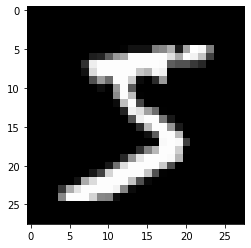

In [5]:
#바로 convolution으로 들어가나??
#아니다. batch_size, height, width, channel 로 모델에 들어가야 한다.
# 60000 28 28 1 처럼 만들어야 한다
plt.imshow(image,'gray')
plt.show()

In [7]:
image = image[tf.newaxis, ... , tf.newaxis]

In [8]:
image.shape

(1, 28, 28, 1)

In [10]:
#feature extraction 과 classification 으로 구분된다.
#먼저 feature extraction - convolution, pooling, 들어간다.

#convolution -> 그림이 있다면, convolution이 가진 weight에 의해 합성이 된다.
tf.keras.layers.Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='SAME',activation='relu')
##filters는 convolution을 통과하고 나서의 channel 수, 즉 ,firlterfh 3채널을 만드는 것
#layer에 나가고 몇개의 filter를 만들 것인지를 말하는 것이다.
##kernel_size는 convolution 사이즈
##stride는 움직이는 거리
##padding은 SAME으로 하면 convolution을 거치게 되고, 이미지가 작아지지 않도록 값이 없는 부분을 zero padding이 생기겍 된다.
##acviation fuc을 해당 레이어에서 사용하고 싶다면 쓰면 된다
##activation func을 안주고 싶다면 안써도 된다. -> 추후에 주고 싶다면

tf.keras.layers.Conv2D(3,3,1,'SAME')
#이렇게 써도 된다.

In [16]:
#visualization
#integer로 모델에 들어가면 에러를 만든다.
image = tf.cast(image,dtype=tf.float32)
image.dtype

tf.float32

In [20]:
image.shape

TensorShape([1, 28, 28, 1])

In [37]:
layer = tf.keras.layers.Conv2D(3,3,1, padding='SAME')
layer

In [38]:
output = layer(image)

In [39]:
output
#(1, 28, 28, 3) 채널 수가 증가했다.
#filter를 통과해서 그렇다,
#padding='VALID' 로 하면 height, weight가 줄어 든다

<tf.Tensor: id=145, shape=(1, 28, 28, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]

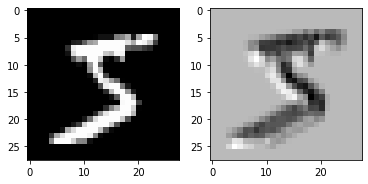

In [41]:
plt.subplot(1,2,1)
plt.imshow(image[0, : , :, 0], 'gray')
plt.subplot(1,2,2)
plt.imshow(output[0, : , :, 0], 'gray')
plt.show()

In [48]:
#weight와 bias를 가져와보자
weight, bias = layer.get_weights()
weight
weight.shape, bias.shape

((3, 3, 1, 3), (3,))

In [52]:
type(output.numpy())

numpy.ndarray

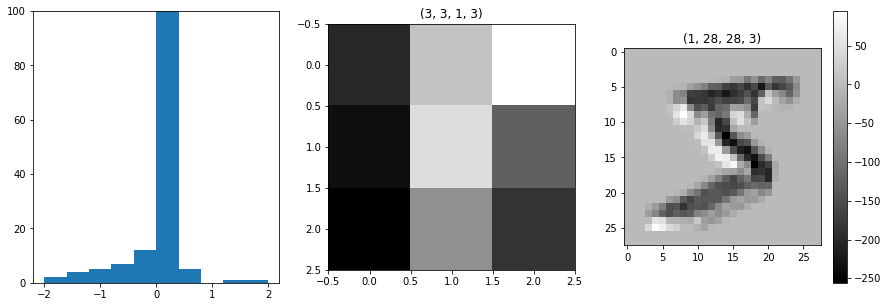

In [64]:
#이렇게 시각화 되는게 보여야 한다.
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2,2])
plt.ylim(0,100)
plt.subplot(132)
plt.title(weight.shape)
plt.imshow(weight[:,:,0,0],'gray')
plt.subplot(133)
plt.title(output.shape)
plt.imshow(output[0, : , : , 0], 'gray')
plt.colorbar()
plt.show()

In [65]:
#지금까지는 convolution이고, 이제는 activation function이다.
#activation  func을 convolution과 함께 하도록 넣을 수 있거나, 따로 할 수 있다.
#activation으로 relu를 하자
#relu를 사용하면, 0 미만에 있는 것들은 다 0으로 바꾸겠다는 것이다.
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output)

In [66]:
act_output
##shape가 그대로 유지 되었다.

<tf.Tensor: id=193, shape=(1, 28, 28, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]

In [69]:
import numpy as np
np.min(act_output) , np.max(act_output)
#0으로 바뀌었다.

(0.0, 349.51947)

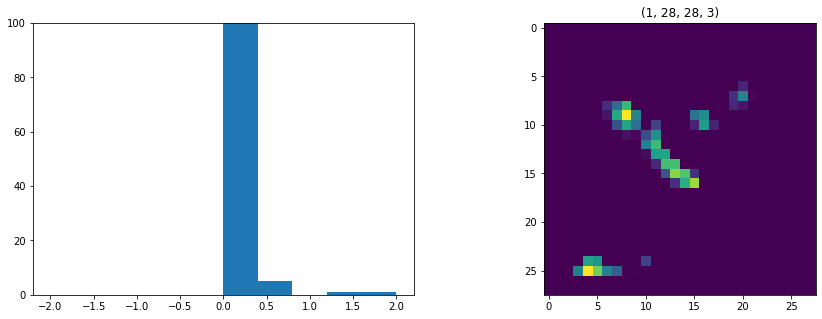

In [72]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(act_output.numpy().ravel(), range=[-2,2])
plt.ylim(0,100)

plt.subplot(122)
plt.title(act_output.shape)
plt.imshow(act_output[0,:,:,0])
plt.show()
#지금 나온 오른쪽 그림이 5에서 특징이 추출된 부분이다.

In [73]:
#pooling을 해보자
#이미지를 앞에서 받으면 강조되는 것만 압축을 하는 것이다.
#이미지가 반씩 줄어든다. 반으로 줄면서 안에 있는 값들에서 가장 큰 값들만 가져온다
#이게 maxPooling이다. 강조된 것만 압축을 해서 가져오는 것이다.
tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2), padding='SAME')

In [74]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2), padding='SAME')
pool_output = pool_layer(act_output)

In [75]:
act_output.shape

TensorShape([1, 28, 28, 3])

In [76]:
pool_output.shape
#반으로 줄어들게 된다.

TensorShape([1, 14, 14, 3])

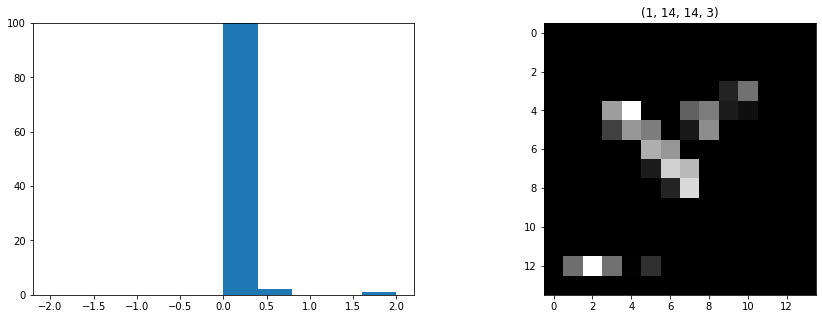

In [78]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(pool_output.numpy().ravel(), range=[-2,2])
plt.ylim(0,100)

plt.subplot(122)
plt.title(pool_output.shape)
plt.imshow(pool_output[0, : , : ,0], 'gray')
plt.show()
#기존 보다 더 이미지가 잘 보이게 된다.

In [79]:
#이제 fully connected 네트워크를 구현해보자
#y = wX+b와 같은 수식을 갖는다. 그리고 activation function이 들어간다.
#flatten을 해보자
import tensorflow as tf

In [80]:
tf.keras.layers.Flatten()

In [81]:
layer = tf.keras.layers.Flatten()

In [82]:
flatten = layer(output)

In [83]:
output.shape

TensorShape([1, 28, 28, 3])

In [84]:
flatten.shape

TensorShape([1, 2352])

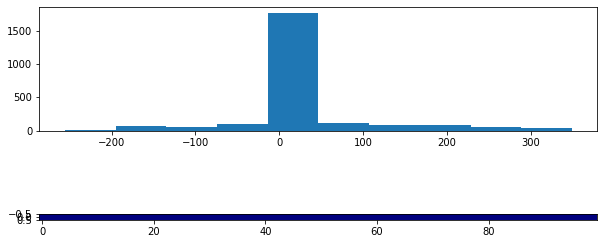

In [87]:
#쭉 펼쳤는데, 1이 남는다. batchsize인 1이 남는다.
#batchsize는 변하지않고, 뒤에 것만 변해야 한다.
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.hist(flatten.numpy().ravel())
plt.subplot(212)
plt.imshow(flatten[:,:100],'jet')
plt.show()

In [88]:
#dense, 이제 노드를 생성해서 연결해주는 것이다.
#32개의 노드와 이제 앞에서 flatten한 부분과 연결하는 것이다.
tf.keras.layers.Dense(32,activation='relu')

In [89]:
layer = tf.keras.layers.Dense(32, activation='relu')

In [90]:
output = layer(flatten)
output.shape

TensorShape([1, 32])

In [94]:
#dense를 통해서 32개의 노드로 변했다.
layer_2 = tf.keras.layers.Dense(10, activation='relu')
ouput_example = layer_2(output)

In [96]:
ouput_example.shape

TensorShape([1, 10])

In [ ]:
#dropout
#fully하게 연결된 부분에서 어떤 것은 학습이 잘되고, 어떤 것들은 학습이 안되는 것들이 있다.
#그래서 overfitting이 되는 문제가 발생, 따라서, 어떤 노드는 죽이고, 어떤 노드만 살리는
#전체 노드를 어떻게 살리니느냐에 따라서 학습이 안되는 부분을 학습이 되도록 만드는 것이다.
#모델이 학습을 끝내고 테스트를 할 때는 다시 fully 모드로 돌아온다.
#학습할 때만 dropout을 사용하고, 이후 테스트에서는 사용안한다는 것이다.
